In [2]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [10]:
loaded_model = pickle.load(open('OVR_classifier.pk1', 'rb'))

In [11]:
data = pd.read_parquet('/Users/piyush/StudienArbeit/last.parquet')
values = ['0.0-_LL-FXXf', '0.6-_LL-FXXf', '0.2-_LL-FXXf', '0.4-_LL-FXXf', '0.5-_LL-FXXf', '0.65-_LL-FXXf', '0.7-_LL-FXXf', '0.75-_LL-FXXf' 
, '0.0-_LL-LBLf', '0.6-_LL-LBLf', '0.2-_LL-LBLf', '0.4-_LL-LBLf', '0.5-_LL-LBLf', '0.65-_LL-LBLf', '0.7-_LL-LBLf', '0.75-_LL-LBLf'
, '0.0-_LL-VBDf', '0.6-_LL-VBDf', '0.2-_LL-VBDf', '0.4-_LL-VBDf', '0.5-_LL-VBDf', '0.65-_LL-VBDf', '0.7-_LL-VBDf', '0.75-_LL-VBDf']
df = data[data.Target.isin(values) == True]

column_to_replace = ['µStrain', 'µStrain.1', 'µStrain.2', 'µStrain.3', 'µStrain.4', 'µStrain.5', 'µStrain.6', 'µStrain.7', 'µStrain.8', 'µStrain.9', 'µStrain.10', 'µStrain.11', 'µStrain.12', 'µStrain.13', 'µStrain.14', 'µStrain.15', 'µStrain.16', 'µStrain.17', 'µStrain.18', 'µStrain.19', 'µStrain.20', 'µStrain.21', 'µStrain.22', 'µStrain.23', 'µStrain.24', 'µStrain.25', 'µStrain.26', 'µStrain.27', 'µStrain.28', 'µStrain.29', 'µStrain.30', 'µStrain.31', 'µStrain.32', 'µStrain.33', 'µStrain.34', 'µStrain.35', 'µStrain.36', 'µStrain.37', 'µStrain.38', 'µStrain.39', 'µStrain.40', 'µStrain.41', 'µStrain.42', 'µStrain.43', 'µStrain.44', 'µStrain.45', 'µStrain.46', 'µStrain.47', 'µStrain.48', 'µStrain.49', 'µStrain.50', 'µStrain.51', 'µStrain.52', 'µStrain.53','µStrain.54','µStrain.55','µStrain.56','µStrain.57','µStrain.58','µStrain.59','µStrain.60','µStrain.61']
for column in column_to_replace:
    df[column] = df[column].fillna(0)

def find_replace(target):
    if target=='0.0-_LL-FXXf':
        return '0'
    elif target=='0.0-_LL-LBLf':
        return '0'
    elif target == '0.0-_LL-VBDf':
        return '0'
    else :
        return target
    

df['Target1'] = df['Target'].apply(find_replace)

print(df)
print(df.head())
print(df.shape)

/var/folders/wz/3mjzhwcs2tv1nm74yrlj4pwr0000gn/T/ipykernel_23050/1595153319.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(0)
/var/folders/wz/3mjzhwcs2tv1nm74yrlj4pwr0000gn/T/ipykernel_23050/1595153319.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target1'] = df['Target'].apply(find_replace)


               UNIT               Unnamed: 1  Unnamed: 2 Unnamed: 3     V  \
1               1.0  2022/03/04 14:29:08.062         0.0   _LL-FXXf  0.00   
2               2.0  2022/03/04 14:29:08.558         0.0   _LL-FXXf  0.00   
3               3.0  2022/03/04 14:29:09.058         0.0   _LL-FXXf  0.00   
4               4.0  2022/03/04 14:29:09.558         0.0   _LL-FXXf  0.00   
5               5.0  2022/03/04 14:29:10.058         0.0   _LL-FXXf  0.01   
...             ...                      ...         ...        ...   ...   
12029066  1341034.0  2022/03/18 07:17:41.891         0.0   _LL-VBDf  9.50   
12029067  1341035.0  2022/03/18 07:17:41.930         0.0   _LL-VBDf  9.50   
12029068  1341036.0  2022/03/18 07:17:41.938         0.0   _LL-VBDf  9.50   
12029069  1341037.0  2022/03/18 07:17:42.430         0.0   _LL-VBDf  9.50   
12029070  1341038.0  2022/03/18 07:17:42.930         0.0   _LL-VBDf  9.50   

         Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  V.1  ...  µStrain.

In [12]:
label_encoder = LabelEncoder()
df['Target1'] = label_encoder.fit_transform(df.loc[:,'Target1'])
print(df['Target1'].unique())
print(df['Target1'].value_counts())
y = df['Target1']
print(y)

[ 0  4  7 10 13 16 19 20  5  2  8 11 14 17 21 15  6  3  9 12 18  1]
Target1
0     3612146
6      975796
12     941260
21     928229
10     928223
11     928211
5      928210
20     928204
4      928204
19     928193
18         20
15         19
9          16
2          12
14         12
17         12
8          10
16          9
3           9
13          8
7           6
1           2
Name: count, dtype: int64
1           0
2           0
3           0
4           0
5           0
           ..
12029066    0
12029067    0
12029068    0
12029069    0
12029070    0
Name: Target1, Length: 12026811, dtype: int64


/var/folders/wz/3mjzhwcs2tv1nm74yrlj4pwr0000gn/T/ipykernel_23050/1089970316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target1'] = label_encoder.fit_transform(df.loc[:,'Target1'])


In [13]:
X = df.iloc[:, 43:104].values

accuracy = loaded_model.score(X,y)
print('Accuracy: ', accuracy)

Accuracy:  0.24677148414488262


In [7]:
predictions = loaded_model.predict(X)

Text(0.5, 1.0, 'Confusion Matrix for Load Condition')


<Axes: title={'center': 'Confusion Matrix for Load Condition'}>

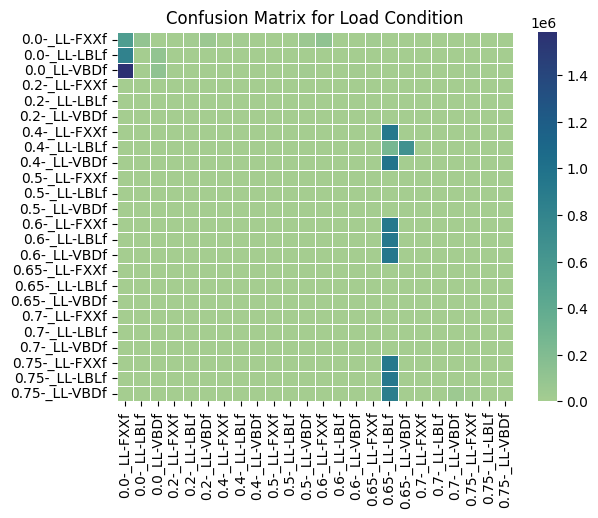

In [9]:
from sklearn.utils.multiclass import unique_labels
unique_labels(y)

#combine labels with confusion matrix
def plot(y, predictions):
    labels = unique_labels(y)
    columns = ['0.0-_LL-FXXf', '0.0-_LL-LBLf', '0.0_LL-VBDf', '0.2-_LL-FXXf', '0.2-_LL-LBLf', '0.2-_LL-VBDf', '0.4-_LL-FXXf', '0.4-_LL-LBLf', '0.4-_LL-VBDf', '0.5-_LL-FXXf', '0.5-_LL-LBLf','0.5-_LL-VBDf','0.6-_LL-FXXf', '0.6-_LL-LBLf', '0.6-_LL-VBDf', '0.65-_LL-FXXf', '0.65-_LL-LBLf', '0.65-_LL-VBDf', '0.7-_LL-FXXf', '0.7-_LL-LBLf', '0.7-_LL-VBDf', '0.75-_LL-FXXf', '0.75-_LL-LBLf', '0.75-_LL-VBDf' ]
    index =   ['0.0-_LL-FXXf', '0.0-_LL-LBLf', '0.0_LL-VBDf', '0.2-_LL-FXXf', '0.2-_LL-LBLf', '0.2-_LL-VBDf', '0.4-_LL-FXXf', '0.4-_LL-LBLf', '0.4-_LL-VBDf', '0.5-_LL-FXXf', '0.5-_LL-LBLf','0.5-_LL-VBDf','0.6-_LL-FXXf', '0.6-_LL-LBLf', '0.6-_LL-VBDf', '0.65-_LL-FXXf', '0.65-_LL-LBLf', '0.65-_LL-VBDf', '0.7-_LL-FXXf', '0.7-_LL-LBLf', '0.7-_LL-VBDf', '0.75-_LL-FXXf', '0.75-_LL-LBLf', '0.75-_LL-VBDf' ]
    table = pd.DataFrame(confusion_matrix(y, predictions),
                         columns = columns, index = index)
    return sns.heatmap(table, annot=False,fmt='d', cmap='crest', linewidths=0.5)
print(plt.title('Confusion Matrix for Load Condition'))
plot(y, predictions)